### Esse Jupiter Notebook contém os códigos de geração dos gráficos do **Relatório do Exercício Programa II**:

> *Tradução Automática de Baixo Recurso: Implementação, Treinamento e Avaliação de Modelos Baseados em LLM para Tradução ortuguês ↔ Tupi Antigo*

Nele estão os códigos:
* Dos histogramas de palavras por sentença de cada corpus
* De cálculo de média, mediana e desvio padrão da quantidade de palavras por sentença
* Dos gráficos de coluna comparativos entre os modelos Zero-Shot
e os corpora
* Dos Heatmaps das versões Zero-Shot e Few-Shot do NLLB


**Autores:** Gustavo Bernardo Ribeiro e Thaís Martins de Sousa

In [ ]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Histogramas e Medidas Estatísticas dos Corpora

In [ ]:
# Funções Utilitárias

def contar_palavras_linha(linha):
    if isinstance(linha, str):
        return len(linha.split())
    return 0

def contar_palavras(linha):
    if isinstance(linha, str):
        return len(linha.split())
    return 0

In [ ]:
def analisar_corpus(caminho_arquivo: str, coluna_texto: int = 0, color):
    # 1. Lê o arquivo CSV
    arquivo = caminho_arquivo
    df = pd.read_csv(arquivo, sep=';')

    # 2. Seleciona a coluna de texto
    coluna_texto = df.columns[0]
    textos = df[coluna_texto]

    # 3. Conta palavras por sentença
    contagem = textos.apply(contar_palavras_linha)

    # 4. Cálculo Estatístico
    media = contagem.mean()
    mediana = contagem.median()
    desvio = contagem.std()

    print(f"Média de palavras por sentença: {media:.2f}")
    print(f"Mediana: {mediana}")
    print(f"Desvio Padrão: {desvio:.2f}")

    total_palavras = textos.apply(contar_palavras).sum()

    print(f"Total de palavras no arquivo: {total_palavras}")

    # 5. Criar histograma
    plt.figure(figsize=(8, 5))

    plt.hist(contagem, bins=20, color=color, edgecolor='white')

    plt.ylim(0, 2100)
    plt.xlim(0, 50)
    plt.xlabel("Número de palavras por sentença")
    plt.ylabel("Frequência")
    plt.title("Histograma de palavras por linha")
    plt.grid(True, alpha=0.1) # Dica: alpha deixa o grid mais suave'
    plt.savefig('histograma_pt_antigo', dpi=300, bbox_inches='tight')
    plt.show()

    return df

In [ ]:
analisar_corpus("tupi_portugues_moderno_limpo.csv", "Brown")
analisar_corpus("tupi_portugues_moderno_limpo.csv", "IndianRed")

## Gráficos das Métricas BLEU, chrF1 e chrF3

Salvando grafico_chrf1_comparativo.png...


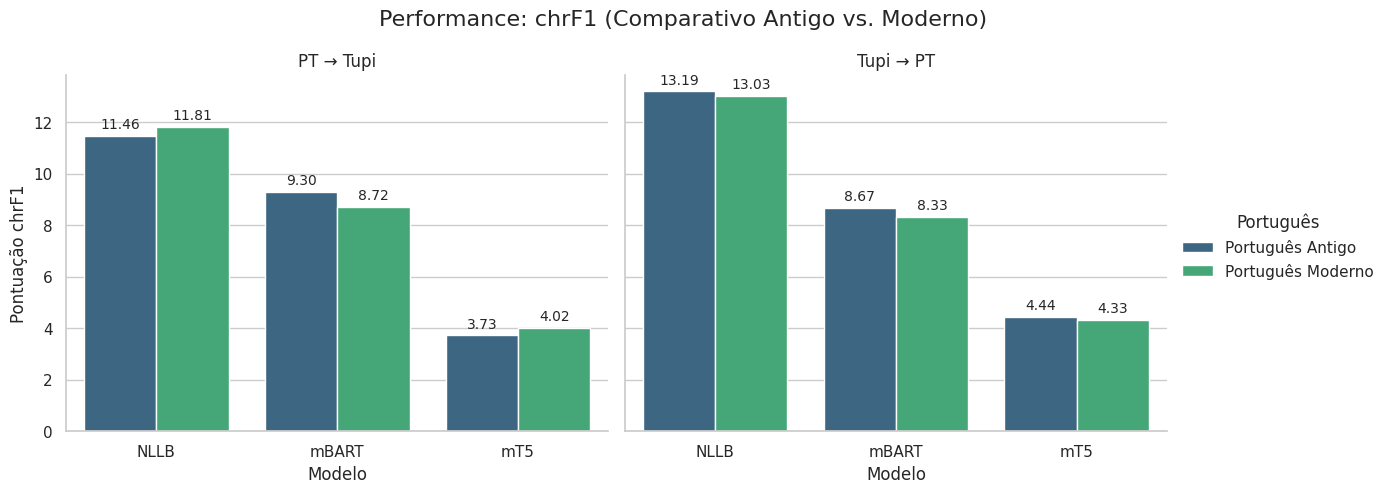

Salvando grafico_bleu_comparativo.png...


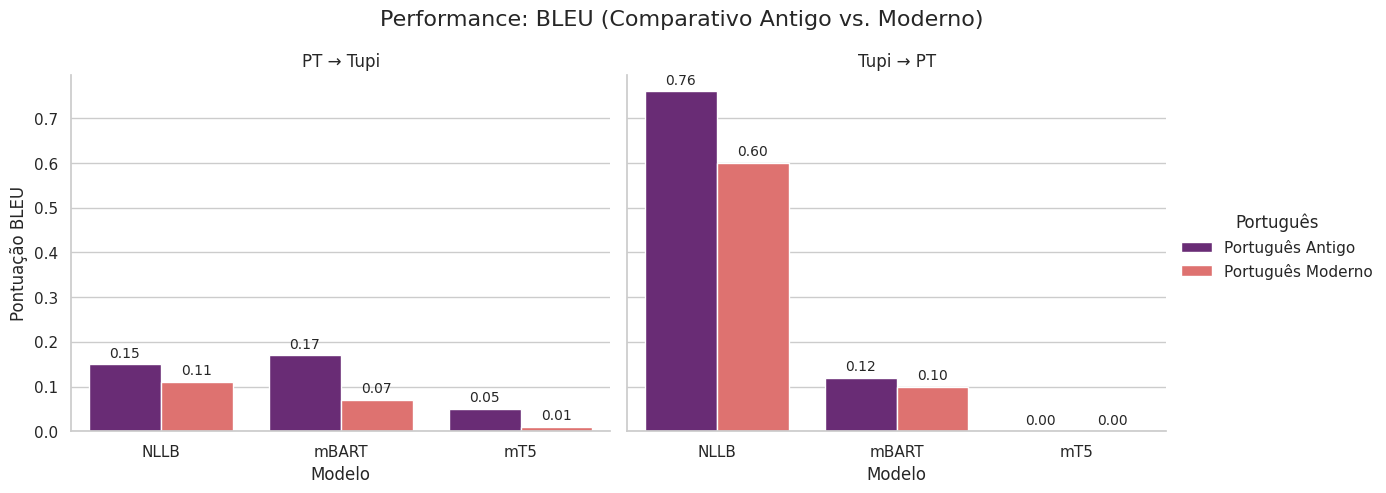

Salvando grafico_chrf3_comparativo.png...


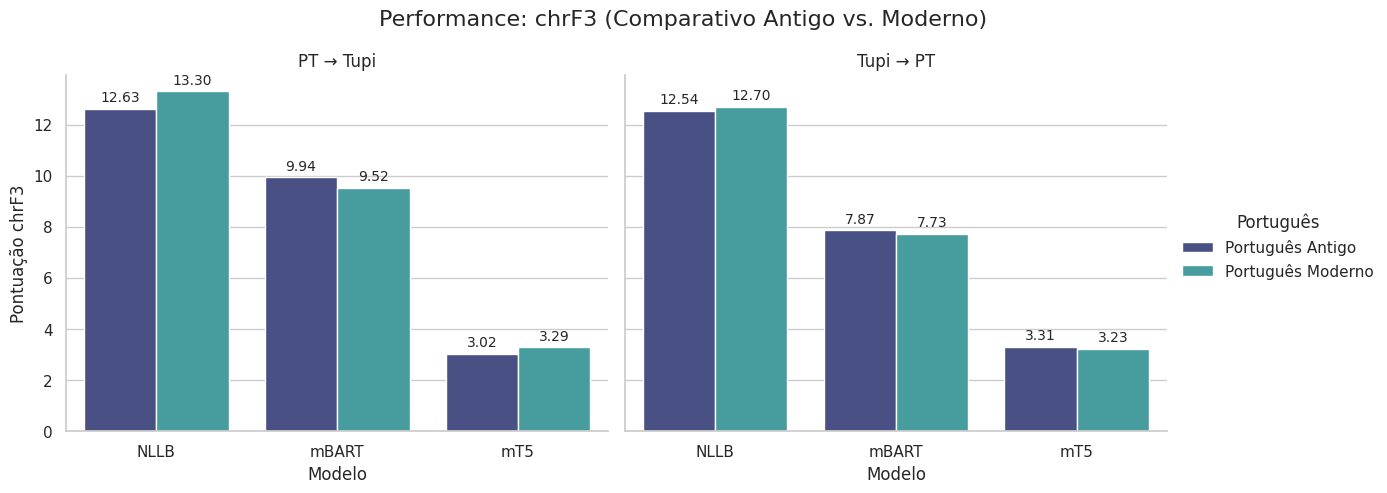

In [ ]:
# Dados ZeroShot
data = {
    'Modelo': ['NLLB', 'NLLB', 'NLLB', 'NLLB',
               'mBART', 'mBART', 'mBART', 'mBART',
               'mT5', 'mT5', 'mT5', 'mT5'],
    'Português': ['Português Antigo', 'Português Antigo', 'Português Moderno', 'Português Moderno'] * 3,
    'Direção': ['PT → Tupi', 'Tupi → PT', 'PT → Tupi', 'Tupi → PT'] * 3,
    'BLEU': [0.15, 0.76, 0.11, 0.60,
             0.17, 0.12, 0.07, 0.10,
             0.05, 0.00, 0.01, 0.00],
    'chrF1': [11.46, 13.19, 11.81, 13.03,
              9.30, 8.67, 8.72, 8.33,
              3.73, 4.44, 4.02, 4.33],
    'chrF3': [12.63, 12.54, 13.30, 12.70,
              9.94, 7.87, 9.52, 7.73,
              3.02, 3.31, 3.29, 3.23]
}

df = pd.DataFrame(data)

# Configuração global
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 11})

# Função geradora dos gráficos
def criar_grafico(metrica, nome_arquivo, paleta):
    g = sns.catplot(
        data=df,
        kind="bar",
        x="Modelo",
        y=metrica,
        hue="Português",
        col="Direção",
        palette=paleta,
        height=5,
        aspect=1.2,
        legend_out=True
    )

    # Título Geral
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Performance: {metrica} (Comparativo Antigo vs. Moderno)', fontsize=16)

    # Ajustar rótulos dos eixos
    g.set_axis_labels("Modelo", f"Pontuação {metrica}")
    g.set_titles("{col_name}") # Título de cada sub-gráfico

    # Adicionar os números em cima das barras
    for ax in g.axes.flat:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

    # Salvando
    print(f"Salvando {nome_arquivo}...")
    plt.savefig(nome_arquivo, dpi=300, bbox_inches='tight')
    plt.show()

# Gerando os 3 Gráficos

# 1. Gráfico chrF1
criar_grafico('chrF1', 'grafico_chrf1_comparativo.png', 'viridis')

# 2. Gráfico BLEU
criar_grafico('BLEU', 'grafico_bleu_comparativo.png', 'magma')

# 3. Gráfico chrF3
criar_grafico('chrF3', 'grafico_chrf3_comparativo.png', 'mako')

Salvo como heatmap_final_label_unico.png


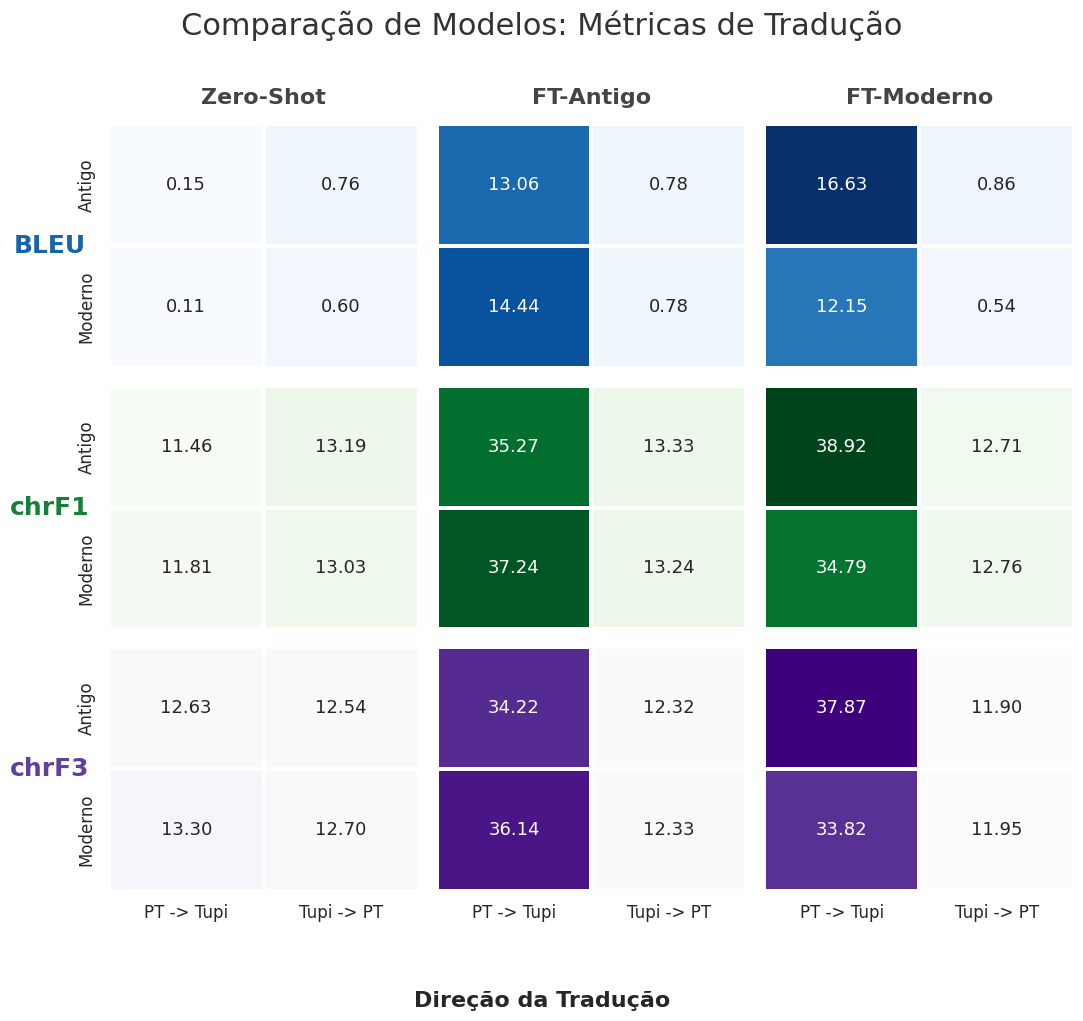

In [ ]:
# 1. Dados do NLLB Zero Shot e Finetunado
data = [
    {'Modelo': 'Zero-Shot', 'Dataset': 'Antigo',  'Direção': 'PT -> Tupi', 'BLEU': 0.15, 'chrF1': 11.46, 'chrF3': 12.63},
    {'Modelo': 'Zero-Shot', 'Dataset': 'Antigo',  'Direção': 'Tupi -> PT', 'BLEU': 0.76, 'chrF1': 13.19, 'chrF3': 12.54},
    {'Modelo': 'Zero-Shot', 'Dataset': 'Moderno', 'Direção': 'PT -> Tupi', 'BLEU': 0.11, 'chrF1': 11.81, 'chrF3': 13.30},
    {'Modelo': 'Zero-Shot', 'Dataset': 'Moderno', 'Direção': 'Tupi -> PT', 'BLEU': 0.60, 'chrF1': 13.03, 'chrF3': 12.70},
    {'Modelo': 'FT-Antigo', 'Dataset': 'Antigo',  'Direção': 'PT -> Tupi', 'BLEU': 13.06, 'chrF1': 35.27, 'chrF3': 34.22},
    {'Modelo': 'FT-Antigo', 'Dataset': 'Antigo',  'Direção': 'Tupi -> PT', 'BLEU': 0.78,  'chrF1': 13.33, 'chrF3': 12.32},
    {'Modelo': 'FT-Antigo', 'Dataset': 'Moderno', 'Direção': 'PT -> Tupi', 'BLEU': 14.44, 'chrF1': 37.24, 'chrF3': 36.14},
    {'Modelo': 'FT-Antigo', 'Dataset': 'Moderno', 'Direção': 'Tupi -> PT', 'BLEU': 0.78,  'chrF1': 13.24, 'chrF3': 12.33},
    {'Modelo': 'FT-Moderno', 'Dataset': 'Antigo',  'Direção': 'PT -> Tupi', 'BLEU': 16.63, 'chrF1': 38.92, 'chrF3': 37.87},
    {'Modelo': 'FT-Moderno', 'Dataset': 'Antigo',  'Direção': 'Tupi -> PT', 'BLEU': 0.86,  'chrF1': 12.71, 'chrF3': 11.90},
    {'Modelo': 'FT-Moderno', 'Dataset': 'Moderno', 'Direção': 'PT -> Tupi', 'BLEU': 12.15, 'chrF1': 34.79, 'chrF3': 33.82},
    {'Modelo': 'FT-Moderno', 'Dataset': 'Moderno', 'Direção': 'Tupi -> PT', 'BLEU': 0.54,  'chrF1': 12.76, 'chrF3': 11.95},
]

df = pd.DataFrame(data)

# --- 2. Configuração Visual ---
metrics = ['BLEU', 'chrF1', 'chrF3']
models = ['Zero-Shot', 'FT-Antigo', 'FT-Moderno']

metric_cmaps = {
    'BLEU': 'Blues',
    'chrF1': 'Greens',
    'chrF3': 'Purples'
}

fig, axes = plt.subplots(len(metrics), len(models), figsize=(11, 11), sharex=True, sharey=True)

for i, metric in enumerate(metrics):
    vmin = df[metric].min()
    vmax = df[metric].max()
    current_cmap = metric_cmaps[metric]

    # Cor para o label lateral
    label_color = plt.get_cmap(current_cmap)(0.8)

    for j, model in enumerate(models):
        ax = axes[i, j]
        subset = df[df['Modelo'] == model]
        heatmap_data = subset.pivot(index="Dataset", columns="Direção", values=metric)

        sns.heatmap(
            heatmap_data,
            ax=ax,
            annot=True,
            fmt=".2f",
            cmap=current_cmap,
            vmin=vmin,
            vmax=vmax,
            cbar=False,
            linewidths=1.5,
            linecolor='white',
            annot_kws={"size": 13}
        )

        # Títulos das Colunas (Modelos) - Topo
        if i == 0:
            ax.set_title(model, fontsize=16, fontweight='bold', pad=15, color='#444444')

        # Títulos das Linhas (Métricas) - Esquerda
        if j == 0:
            ax.set_ylabel(f"{metric}", fontsize=18, fontweight='bold', labelpad=20, color=label_color, rotation=0, va='center')
        else:
            ax.set_ylabel("")

        # Remove o label X individual dos gráficos
        ax.set_xlabel("")
        ax.tick_params(axis='both', which='major', labelsize=12)

# 3. Ajustes Finais de Layout

# Adiciona um label X único
fig.supxlabel("Direção da Tradução", fontsize=16, fontweight='bold', y=0.05)

# Título Geral
plt.suptitle("Comparação de Modelos: Métricas de Tradução", fontsize=22, y=0.96, color='#333333')

plt.tight_layout(rect=[0, 0.08, 1, 0.95])

filename = 'heatmap_final_label_unico.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Salvo como {filename}")
plt.show()